<a href="https://colab.research.google.com/github/abbos-trnv/abbos-trnv/blob/main/HSE_analytics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# О курсе

* Курс посвящен введению в аналитику и аналитике данных в Python

* В курсе будет три занятия (онлайн в zoom с записью)

* В курсе будет два домашних задания (после 2го и после 3го занятия - дедлайн 30 июля)

* Формула оценки: O = 0.5 * ДЗ1 + 0.5 * ДЗ2

# Введение в аналитику - 1

Мы будем работать с датасетом про отток клиентов телекома - в нем содержатся различные характеристики клиентов и информация об оттоке.

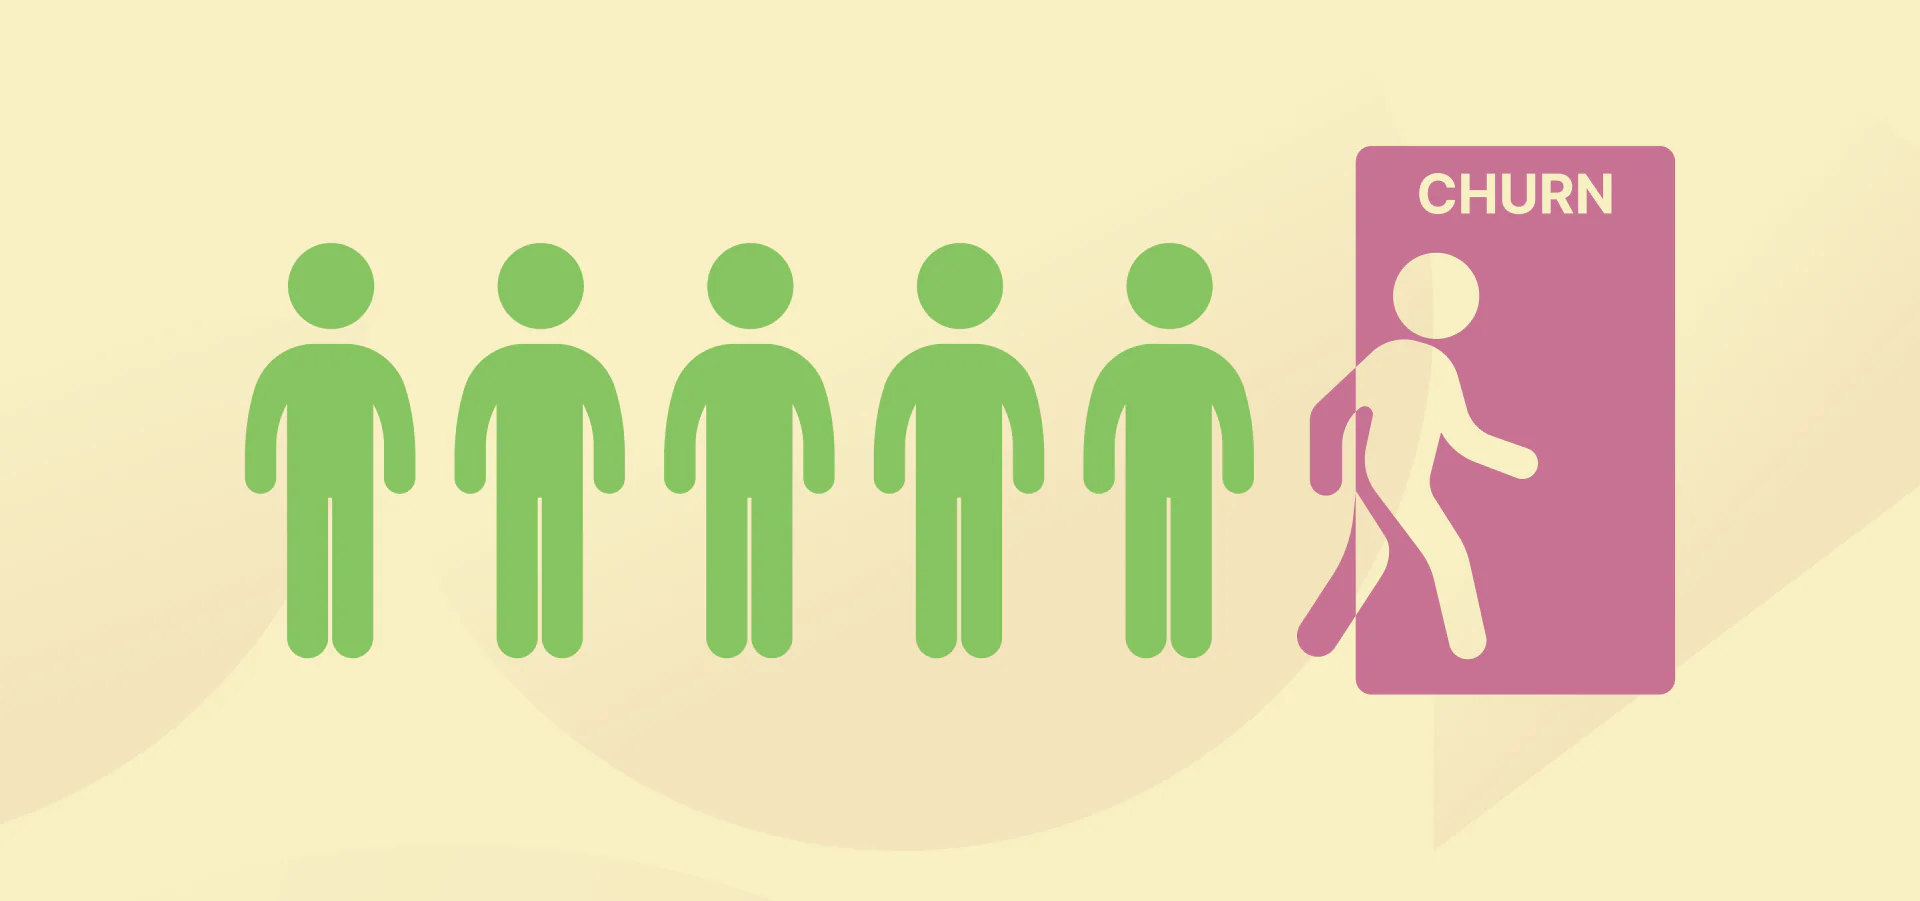

**Цели на сегодня:**

* понять влияние различных характеристик клиентов на отток

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

* научиться строить one-line дашборды

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

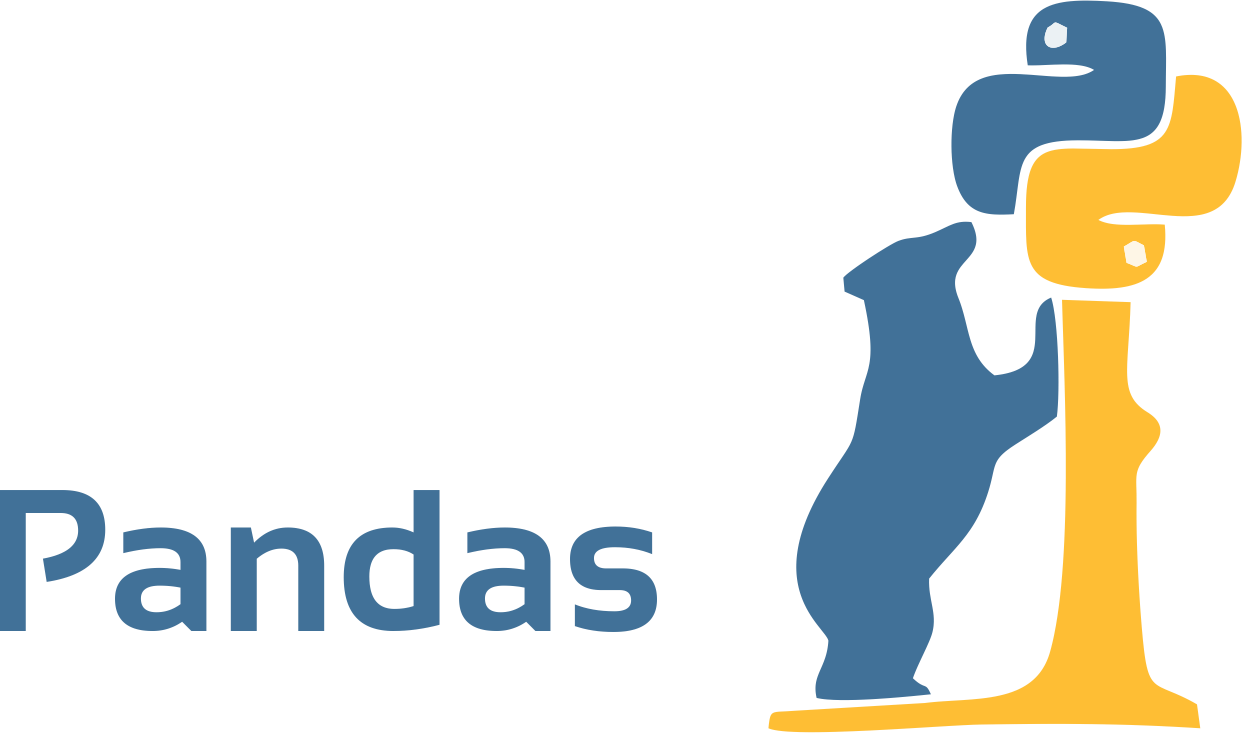

In [ ]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/all_datasets/main/CustomerChurn.csv"

In [ ]:
df = pd.read_csv(DATASET)

df.head()

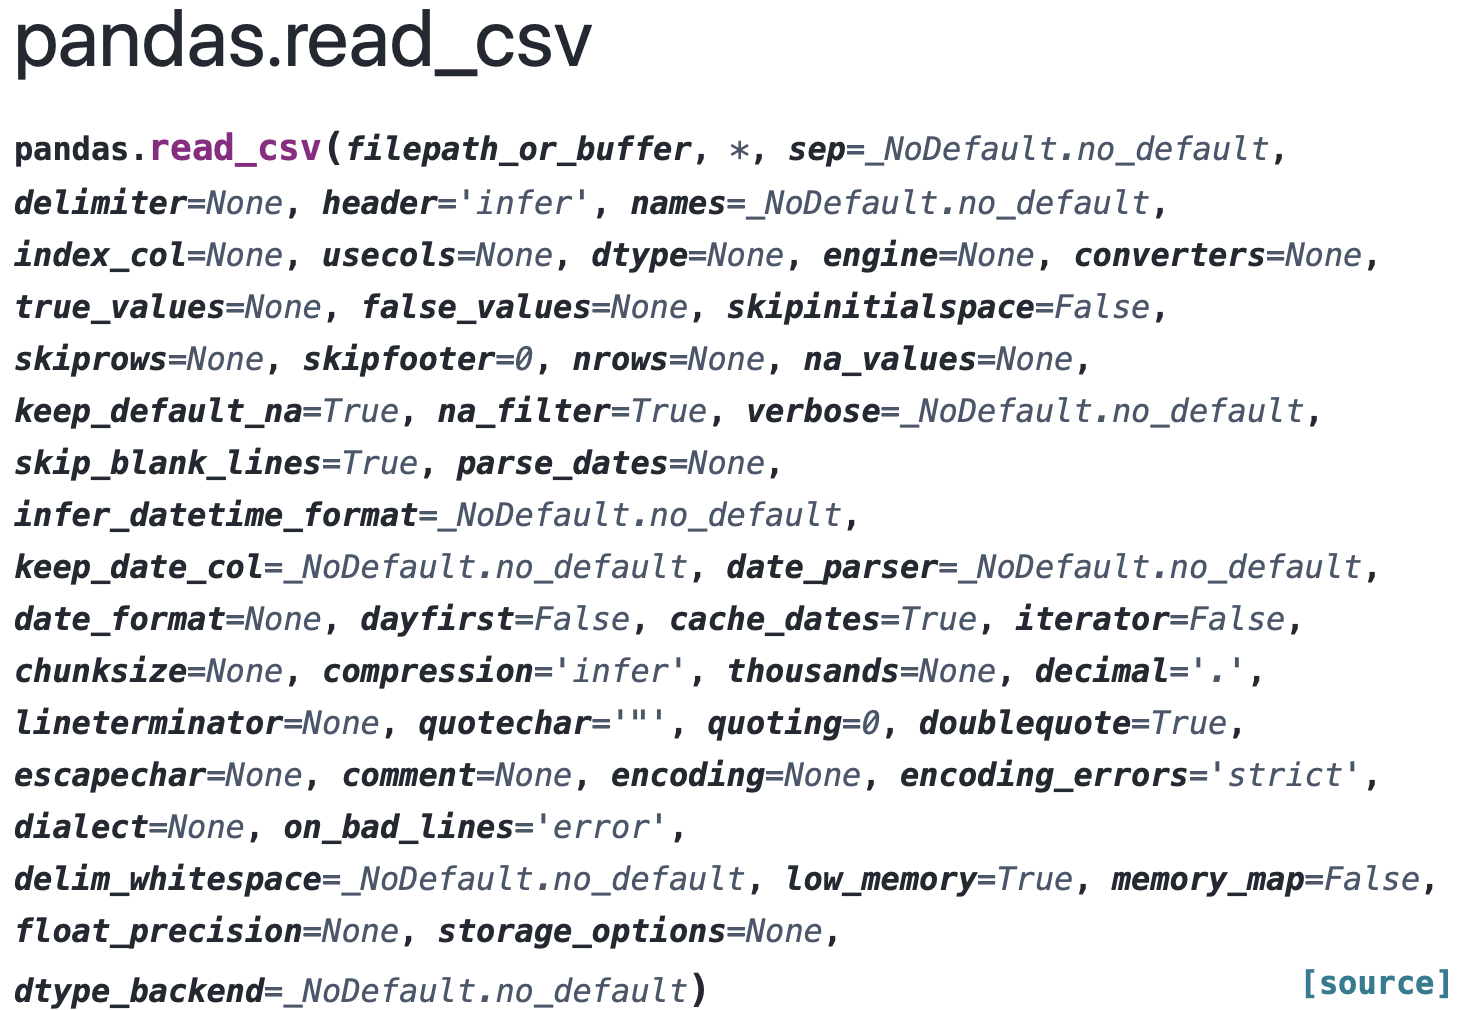

## Описание данных

* `gender` - Whether the customer is a male or a female

* `SeniorCitizen` - Whether the customer is a senior citizen or not (1, 0)

* `Partner` - Whether the customer has a partner or not (Yes, No)

* `Dependents` - Whether the customer has dependents or not (Yes, No)

* `tenure` - Number of months the customer has stayed with the company

* `PhoneService` - Whether the customer has a phone service or not (Yes, No)

* `MultipleLines` - Whether the customer has multiple lines or not (Yes, No, No phone service)

* `InternetService` - Customer’s internet service provider (DSL, Fiber optic, No)

* `OnlineSecurity` - Whether the customer has online security or not (Yes, No, No internet service)

* `OnlineBackup` - Whether the customer has online backup or not (Yes, No, No internet service)

* `DeviceProtection` - Whether the customer has device protection or not (Yes, No, No internet service)

* `TechSupport` - Whether the customer has tech support or not (Yes, No, No internet service)

* `StreamingTV` - Whether the customer has streaming TV or not (Yes, No, No internet service)

* `StreamingMovies` - Whether the customer has streaming movies or not (Yes, No, No internet service)

* `Contract` - The contract term of the customer (Month-to-month, One year, Two year)

* `PaperlessBilling` - Whether the customer has paperless billing or not (Yes, No)

* `PaymentMethod` - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card

* `MonthlyCharges` - The amount charged to the customer monthly

* `TotalCharges` - The total amount charged to the customer

* `Churn` - Whether the customer churned or not (Yes or No)

In [ ]:
df.columns

In [ ]:
df.head(10)

In [ ]:
df.tail()

In [ ]:
df.sample(3)

## Исследование данных

Размер датасета

In [ ]:
df.shape

Информация о типах данных и пропусках

In [ ]:
df.info()

Основные числовые характеристики

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

In [ ]:
df.describe(include='all')

Посмотрим есть ли дубли в данных

In [ ]:
df.duplicated().sum()

## Гистограммы распределения числовых признаков

In [ ]:
df.hist(bins=100, figsize=(8,8));

## Однофакторный анализ

* Будем изучать каждый столбец (фактор) в отдельности

* Также будем смотреть влияние этого фактора на целевую величину (отток)

Это называется однофакторным анализом.


**ВАЖНО!** Мы не делаем анализ просто так, ради анализа. Результатом любого кода и графиков должны быть ВЫВОДЫ - их пишем текстом.

### tenure - число месяцев, которое клиент провел с компанией

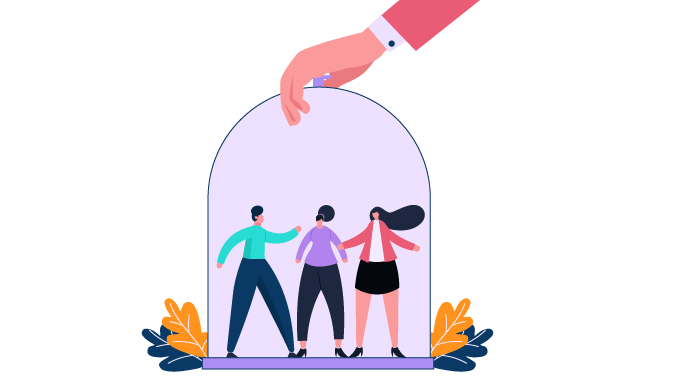

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df.tenure);

In [ ]:
plt.figure(figsize=(4,3))

plt.hist(df.tenure, bins=20);

In [ ]:
plt.figure(figsize=(8,6))

sns.histplot(df.tenure, bins=100);

Посмотрим на максимальное и минимальное значения

In [ ]:
df.tenure.min(), df.tenure.max()

(0, 72)

Сколько клиентов в комании не больше года?

In [ ]:
len(df[df.tenure <= 12])

2186

Какая доля клиентов (процент) в компании больше года?

In [ ]:
100 * len(df[df.tenure > 12]) / len(df)

68.96209001845804

Посмотрим как tenure на отток

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='Churn', y='tenure', data = df, palette='summer')
plt.title('Churn - tenure')
plt.show()

In [ ]:
df['Churn'] = df['Churn'].map({'Yes' : 1, 'No' : 0})

In [ ]:
np.corrcoef(df.tenure, df.Churn)[0][1]

-0.352228670113078

## Выводы по tenure

* Почти 70% клиентов обслуживаются в компании дольше года

* Оттоковые клиенты обслуживаются в компании в среднем меньше, чем не оттоковые

### Gender (пол)

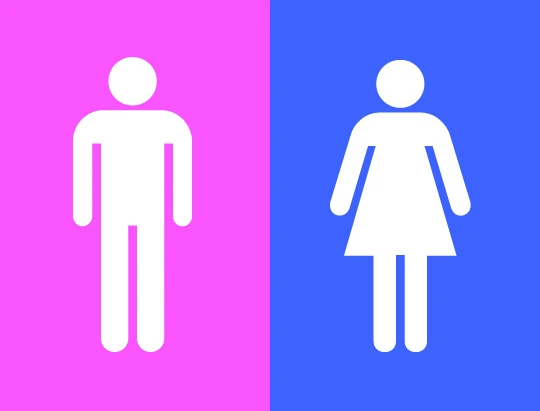

In [ ]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [ ]:
df['gender'].value_counts(normalize=True)

gender
Male      0.504756
Female    0.495244
Name: proportion, dtype: float64

<Axes: >

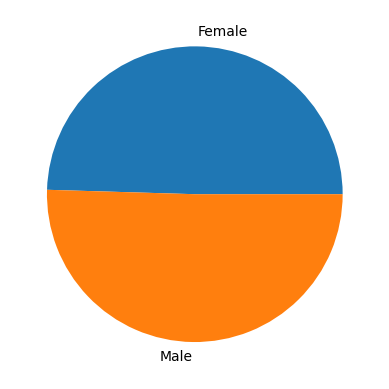

In [ ]:
df.groupby('gender').size().plot(kind='pie')

Посмотрим как связаны пол клиента и отток

<ipython-input-34-7e71e123afeb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Churn', data = df, palette='summer')


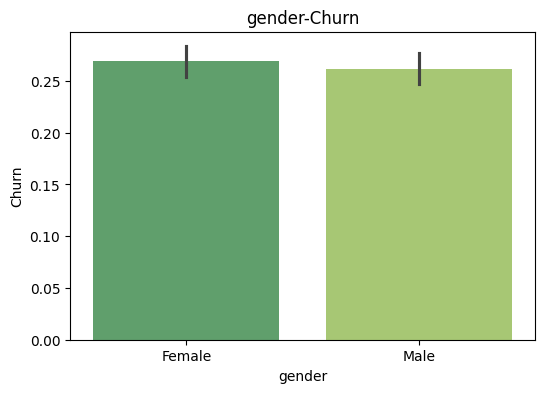

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(x='gender', y='Churn', data = df, palette='summer')
plt.title('gender-Churn')
plt.show();

## Выводы по gender

* Мужчин и женщин в данных примерно поровну

* Пол не влияет на показатель оттока

### Задание 2

Вычислите долю оттоковых клиентов среди женщин

In [ ]:
# ваш код здесь

df[df.gender == 'Female']['Churn'].mean()

0.26920871559633025

Посчитаем средний tenure среди женщин и среди мужчин

In [ ]:
df.groupby('gender')['tenure'].mean()

gender
Female    32.244553
Male      32.495359
Name: tenure, dtype: float64

Посчитаем несколько характеристик в зависимости от огранки

In [ ]:
df.groupby('gender').agg(TenureMean=('tenure','mean'),
                      ChurnMean=('Churn', 'mean'))

TenureMean  ChurnMean
gender                       
Female   32.244553   0.269209
Male     32.495359   0.261603

In [ ]:
df.groupby('gender').agg(TenureMean=('tenure','mean'),
                      ChurnMean=('Churn', 'mean')).sort_values(by='ChurnMean', ascending=False)

TenureMean  ChurnMean
gender                       
Female   32.244553   0.269209
Male     32.495359   0.261603

## PaymentMethod

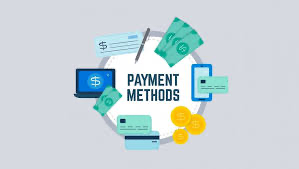

Какие методы оплаты используют клиенты?

In [ ]:
df['PaymentMethod'].value_counts(normalize = True)

PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.216101
Name: proportion, dtype: float64

<Axes: >

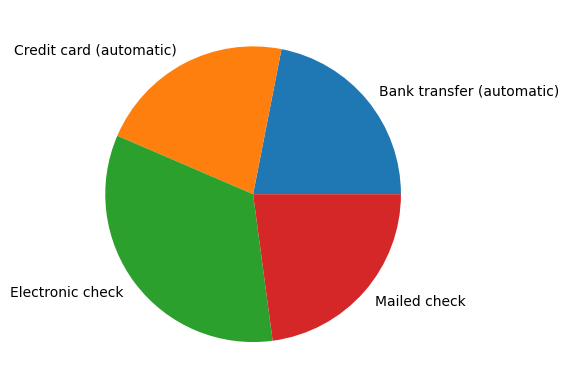

In [ ]:
df.groupby('PaymentMethod').size().plot(kind='pie')

### Задание 3

Какой метод оплаты предпочитают оттоковые клиенты? А не оттоковые?

In [ ]:
# ваш код здесь

df[df['Churn'] == 1]['PaymentMethod'].value_counts(normalize = True)

PaymentMethod
Electronic check             0.573034
Mailed check                 0.164794
Bank transfer (automatic)    0.138042
Credit card (automatic)      0.124131
Name: proportion, dtype: float64

In [ ]:
df[df['Churn'] == 0]['PaymentMethod'].value_counts(normalize = True)

PaymentMethod
Mailed check                 0.252029
Electronic check             0.250097
Credit card (automatic)      0.249324
Bank transfer (automatic)    0.248550
Name: proportion, dtype: float64

## Выводы по PaymentMethod

* Клиенты используют 4 различных метода оплаты

* Оттоковые клиенты чаще всего используют метод Electronic check

* Не оттоковые клиенты не отдают предпочтение какому-то определенному методу оплаты

### Задание 4

Постройте гистограмму зависимости оттока от метода оплаты, с дополнительным разбиением по полу.

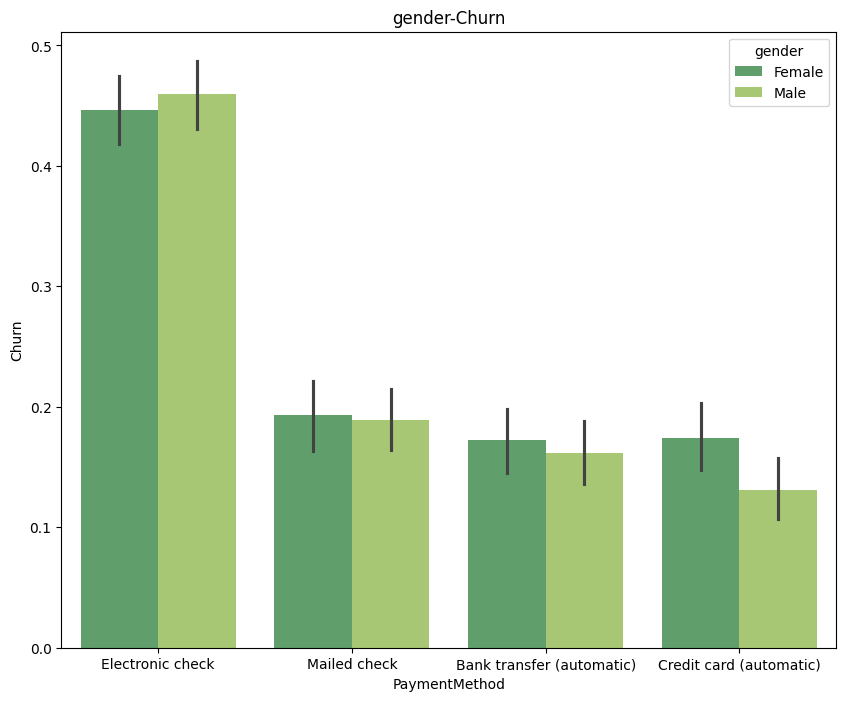

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='PaymentMethod', y='Churn', hue='gender', data = df, palette='summer')
plt.title('gender-Churn')
plt.show();

## MonthlyCharges

MC.svg

### Задание 5

Постройте гистограмму распределения MonthlyCharges

<Axes: >

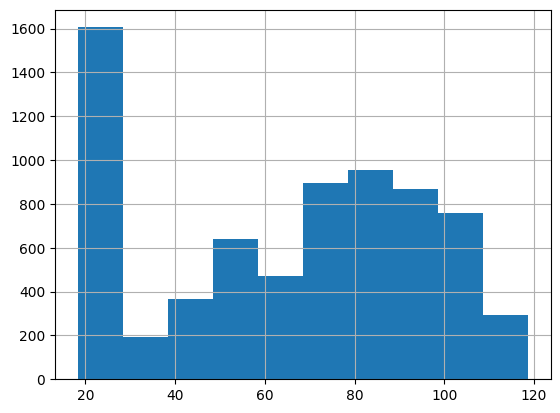

In [ ]:
# ваш код здесь

df['MonthlyCharges'].hist()

### Задание 6

На визуализации вычислите средний MonthlyCharges для оттоковых и не оттоковых клиентов.

<ipython-input-45-f2a73e56aa66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Churn', y='MonthlyCharges', data = df, palette='summer')


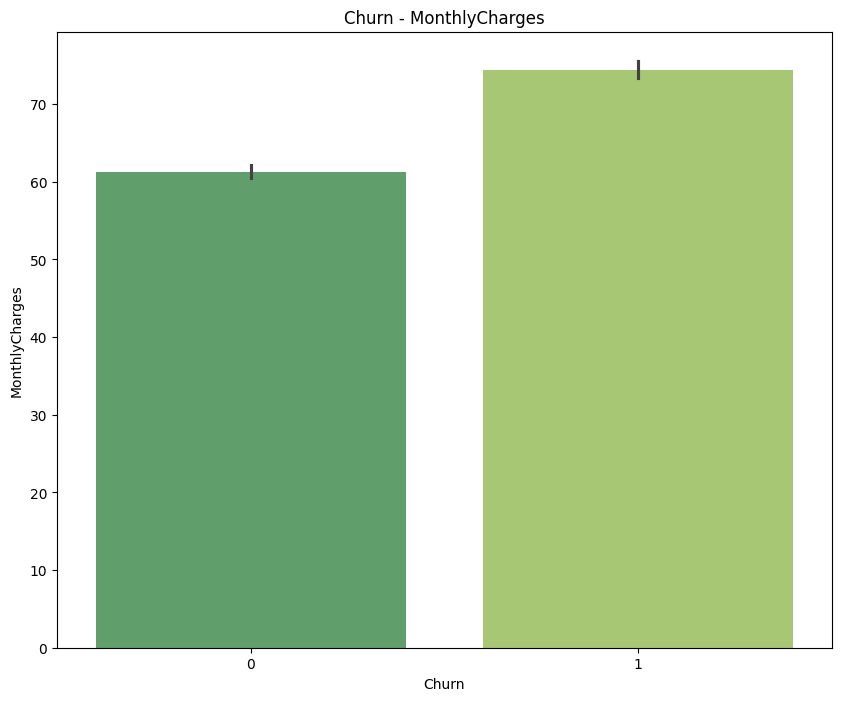

In [ ]:
plt.figure(figsize=(10,8))

sns.barplot(x='Churn', y='MonthlyCharges', data = df, palette='summer')
plt.title('Churn - MonthlyCharges')
plt.show();

### Задание 7

Вычислите корреляцию между MonthlyCharges и оттоком

In [ ]:
np.corrcoef(df.MonthlyCharges, df.Churn)[0][1]

0.19335642223784694

### Задание 8

Верно ли, что чем больше tenure - тем больше MonthlyCharges?

Постройте диаграмму рассеяния для отображения связи между этими величинами.

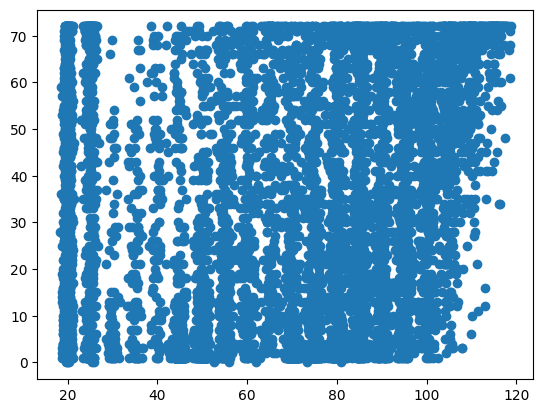

In [ ]:
# ваш код здесь

plt.scatter(df.MonthlyCharges, df.tenure)

## Выводы по MonthlyCharges

* Оттоковые клиенты в среднем имеют большие траты, чем не оттоковые

* Уровень трат не связан с показателем tenure

# Дашборды (или аналитика в одну строчку)

Существует несколько удобных библиотек, которые позволяют построить дашборд с простой аналитикой буквально в одну строчку кода, и сохранить результат в виде html-отчета.

## Pandas profiling

In [ ]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 42.8 MB/s eta 0:00:00


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
df_copy = pd.read_csv(DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [ ]:
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile_report.to_file('ChurnClients_report.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Sweetviz

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv

# Create an analysis report for your data
report = sv.analyze(df)

# Display the report
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Autoviz

In [ ]:
!pip install autoviz

In [ ]:
from autoviz import AutoViz_Class

AV = AutoViz_Class()
dft = AV.AutoViz(df, chart_format='html')

dft

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (7043, 21)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  11
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  5
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number o

Saving distplots_nums in HTML format


Saving violinplots in HTML format


No date vars could be found in data set


Saving heatmaps in HTML format


Saving cat_var_plots in HTML format
                                               

Time to run AutoViz (in seconds) = 27


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female        0          Yes       No        1     
1     5575-GNVDE    Male        0           No       No       34     
2     3668-QPYBK    Male        0           No       No        2     
3     7795-CFOCW    Male        0           No       No       45     
4     9237-HQITU  Female        0           No       No        2     
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male        0          Yes      Yes       24     
7039  2234-XADUH  Female        0          Yes      Yes       72     
7040  4801-JZAZL  Female        0          Yes      Yes       11     
7041  8361-LTMKD    Male        1          Yes       No        4     
7042  3186-AJIEK    Male        0           No       No       66     

     PhoneService   MultipleLines   InternetService OnlineSecurity  \
0          No      No phone service            DSL         No        
1         Yes                    No            DSL        Yes        
2         Yes                    No            DSL        Yes        
3          No      No phone service            DSL        Yes        
4         Yes                    No    Fiber optic         No        
...           ...               ...             ...            ...   
7038      Yes                   Yes            DSL        Yes        
7039      Yes                   Yes    Fiber optic         No        
7040       No      No phone service            DSL        Yes        
7041      Yes                   Yes    Fiber optic         No        
7042      Yes                    No    Fiber optic        Yes        

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0         Yes             No             No          No            No        
1          No            Yes             No          No            No        
2         Yes             No             No          No            No        
3          No            Yes            Yes          No            No        
4          No             No             No          No            No        
...           ...              ...         ...         ...             ...   
7038       No            Yes            Yes         Yes           Yes        
7039      Yes            Yes             No         Yes           Yes        
7040       No             No             No          No            No        
7041       No             No             No          No            No        
7042       No            Yes            Yes         Yes           Yes        

         Contract    PaperlessBilling       PaymentMethod         \
0     Month-to-month        Yes                 Electronic check   
1           One year         No                     Mailed check   
2     Month-to-month        Yes                     Mailed check   
3           One year         No        Bank transfer (automatic)   
4     Month-to-month        Yes                 Electronic check   
...              ...              ...                        ...   
7038        One year        Yes                     Mailed check   
7039        One year        Yes          Credit card (automatic)   
7040  Month-to-month        Yes                 Electronic check   
7041  Month-to-month        Yes                     Mailed check   
7042        Two year        Yes        Bank transfer (automatic)   

      MonthlyCharges TotalCharges  Churn  
0          29.85          29.85      0    
1          56.95         1889.5      0    
2          53.85         108.15      1    
3          42.30        1840.75      0    
4          70.70         151.65      1    
...              ...          ...    ...  
7038       84.80         1990.5      0    
7039      103.20         7362.9      0    
7040       29.60         346.45      0    
7041       74.40          306.6      1    
7042      105.65         6844.5      0    

[7043 rows x 21 columns]

# Домашнее задание (необязательное, для тренировки)

## Contract

1. Сколько и каких видов контрактов (в процентах) присутствует в данных?

In [ ]:
# ваш код здесь

2. Как зависит отток от вида контракта?

Постройте barplot, чтобы ответить на этот вопрос.

In [ ]:
# ваш код здесь

3. Добавьте дополнительную детализацию по полу внутри каждого вида контракта на гистограмме.

In [ ]:
# ваш код здесь

4. Какой процент клиентов среди женщин с годовым (one year) контрактом покидает компанию?

In [ ]:
# ваш код здесь

5. Сколько мужчин, пользующихся услугами оператора более года, имеют Month-to-month контракт?

In [ ]:
# ваш код здесь

6. При помощи groupby для каждого вида контракта вычислите:
* среднюю длительность обслуживания (mean tenure)
* средний отток (mean churn)
* среднемесячные траты (mean MonthlyCharges)

Отсортируйте полученную таблицу по возрастанию значения mean churn.

In [ ]:
# ваш код здесь

## Сделайте выводы по признаку Contract

ваши выводы здесь